In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [18]:
# Lire la donnée
iris = pd.read_csv("iris.csv")

In [49]:
# Transformer
feature_names = iris.columns.values
names = iris["class"].unique()
x = np.array(iris)

iris["class"], unique_names = iris["class"].factorize()

y = np.array(iris["class"])

In [50]:
# One hot encoding
enc = OneHotEncoder()
y_encoded = enc.fit_transform(y[:, np.newaxis]).toarray()

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(
    x_scaled, y_encoded, test_size=0.5, random_state=2
)

n_features = x.shape[1]
n_classes = y_encoded.shape[1]

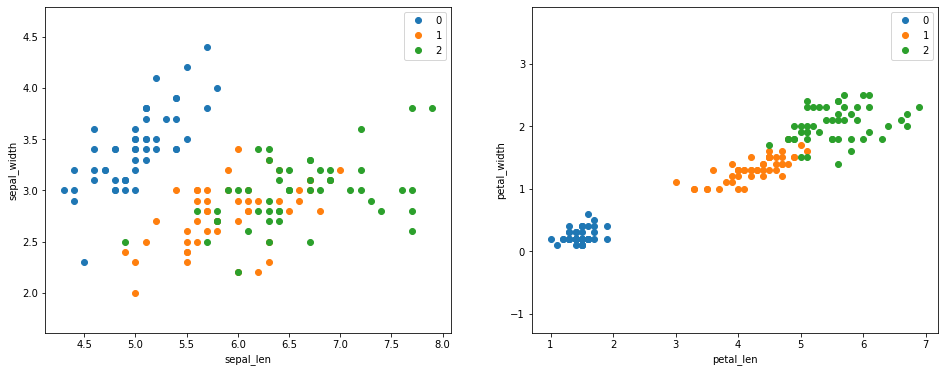

In [62]:
def plot_sepal(a, b, ax):
    for target, target_name in enumerate(names):
        x_plot = x[y == target]
        ax.plot(
            x_plot[:, a], x_plot[:, b], linestyle="none", marker="o", label=target_name
        )
    ax.set_xlabel(feature_names[a])
    ax.set_ylabel(feature_names[b])
    plt.axis("equal")
    ax.legend()


fig = plt.figure(figsize=(16, 6))
ax1 = plt.subplot(1, 2, 1)
plot_sepal(0, 1, ax1)
ax2 = plt.subplot(1, 2, 2)
plot_sepal(2, 3, ax2)

In [63]:
from keras.models import Sequential
from keras.layers import Dense

# TODO : Factoriser en fonction

# Create model
def create_model(layers):
    m = Sequential(name="model_1")
    for i in range(layers):
        m.add(Dense(8, input_dim=n_features, activation="relu"))
    m.add(Dense(n_classes, activation="softmax"))

    # Compile model
    m.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return m


models = [
    create_model(1),
    create_model(2),
    create_model(3),
]

for model in models:
    model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 8)                 48        
                                                                 
 dense_10 (Dense)            (None, 3)                 27        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 8)                 48        
                                                                 
 dense_12 (Dense)            (None, 8)                 72        
                                                                 
 dense_13 (Dense)            (None, 3)        

In [55]:
from keras.callbacks import TensorBoard

history_dict = {}

# TensorBoard Callback
cb = TensorBoard()

for model in models:
    print("Model name:", model.name)
    history_callback = model.fit(
        x_train,
        y_train,
        batch_size=5,
        epochs=50,
        verbose=0,
        validation_data=(x_test, y_test),
        callbacks=[cb],
    )
    score = model.evaluate(x_test, y_test, verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])

    history_dict[model.name] = [history_callback, model]

Model name: model_1
Test loss: 0.18283778429031372
Test accuracy: 1.0
Model name: model_2
Test loss: 0.0590101033449173
Test accuracy: 0.9866666793823242
Model name: model_3
Test loss: 0.02549023926258087
Test accuracy: 1.0


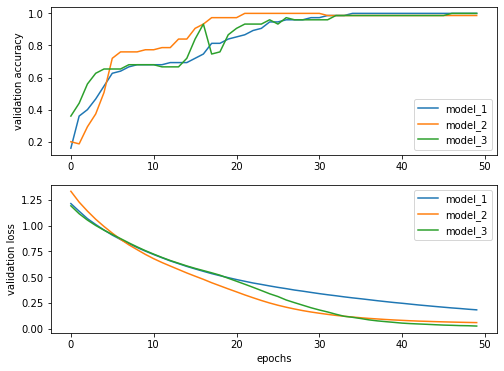

In [56]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for model_name in history_dict:
    val_accurady = history_dict[model_name][0].history["val_accuracy"]
    val_loss = history_dict[model_name][0].history["val_loss"]
    ax1.plot(val_accurady, label=model_name)
    ax2.plot(val_loss, label=model_name)

ax1.set_ylabel("validation accuracy")
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs")
ax1.legend()
ax2.legend();

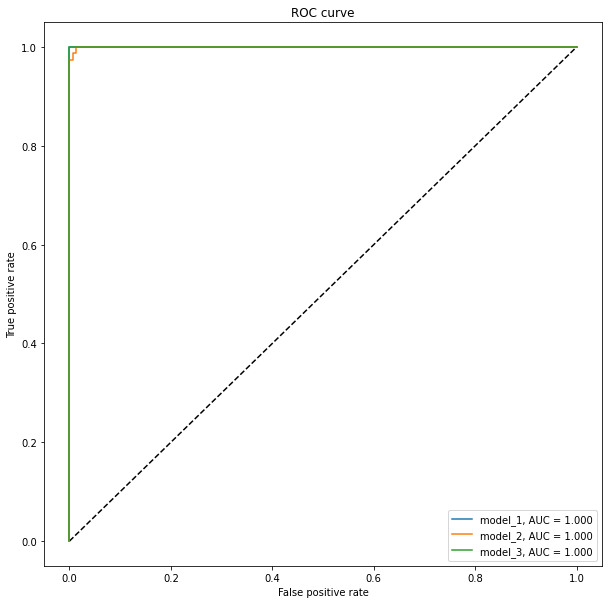

In [57]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 10))
plt.plot([0, 1], [0, 1], "k--")

for model_name in history_dict:
    model = history_dict[model_name][1]

    y_pred = model.predict(x_test)
    fpr, tpr, threshold = roc_curve(y_test.ravel(), y_pred.ravel())

    plt.plot(fpr, tpr, label="{}, AUC = {:.3f}".format(model_name, auc(fpr, tpr)))
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.title("ROC curve")
plt.legend();